# PCA 

It is a feature extraction technique,reduces dimensions of the features

Geometric intuition: bring higher dimension of the data to lower dimension.
Core benefits:
->dimensionality reduction
->visualisation


Working of PCA: 

PCA works on a process called Eigenvalue Decomposition of a covariance matrix of a data set. The steps are as follows:

-> Standardization of data is important!(scaling)
-> mean centering.

->First, calculate the covariance matrix of a data set.

->Then, calculate the eigenvectors of the covariance matrix.

->The eigenvector having the highest eigenvalue represents the direction in which there is the highest variance. So this will help in identifying the first principal component.

->The eigenvector having the next highest eigenvalue represents the direction in which data has the highest remaining variance and also orthogonal to the first direction. So, this helps in identifying the second principal component.

->Like this, identify the top ‘k’ eigenvectors having top ‘k’ eigenvalues to get the ‘k’ principal components.

![WhatsApp Image 2024-06-13 at 18.38.33_5266a21c.jpg](<attachment:WhatsApp Image 2024-06-13 at 18.38.33_5266a21c.jpg>)
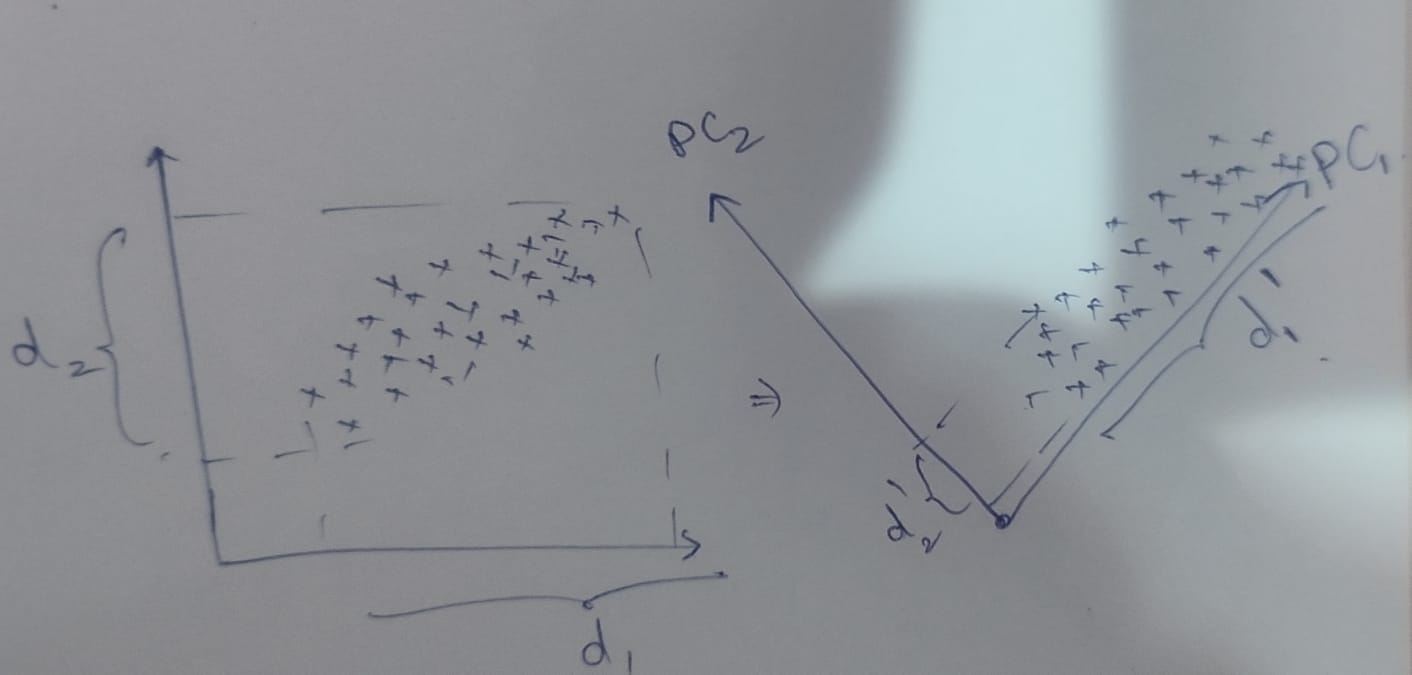

Covariance matrix->

Var(X1)          Cov(X2,X1)

Cov(X1,X2)       Var(X2)


->eigen decomposition of Cov matrix

# Core formulation:

from rayleigh's Quotient , we can prove that the PCA with largest variance is the eigen vector with the largest eigen value of the Covariance matrix.

# hence if we have 3 features and we might want to work with only 2 we get the 2 eigen vectors with the largest eigen values and project the 3D samples onto the 2D plane , or we can also project them into 1D plane. 

(1797, 64)
pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     1.0
pixel_0_3    12.0
pixel_0_4     5.0
             ... 
pixel_7_3    10.0
pixel_7_4    16.0
pixel_7_5    12.0
pixel_7_6     1.0
pixel_7_7     0.0
Name: 101, Length: 64, dtype: float64
0


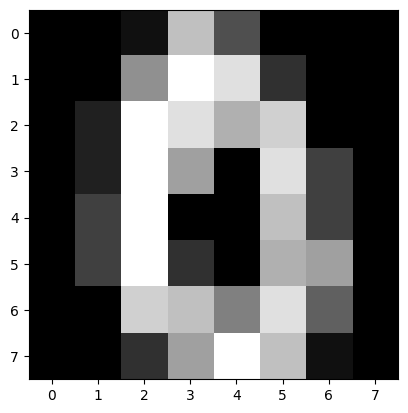

In [31]:
from sklearn.datasets import load_digits 
# from sklearn.datasets import load_digits
digits,target=load_digits(as_frame=True,return_X_y=True)
print(digits.shape)
import matplotlib.pyplot as plt
plt.gray()
print(digits.iloc[101])
print(target.iloc[101])
plt.imshow(digits.iloc[101].values.reshape(8,8))

In [32]:
print(digits.shape)
print(target.shape)
digits

(1797, 64)
(1797,)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(digits,target,test_size=0.2)
print(X_train.shape,X_test.shape)

(1437, 64) (360, 64)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
print(Y_test)
res=model.predict(X_test)
print(res)
accuracy_score(res,Y_test)

308     7
451     6
1346    3
585     9
1448    5
       ..
1625    2
1200    7
483     4
281     5
805     9
Name: target, Length: 360, dtype: int32
[7 6 3 9 5 5 7 8 3 3 0 6 5 2 2 4 0 4 5 6 3 2 1 3 6 8 9 8 8 4 2 0 7 3 4 2 2
 9 6 7 9 6 7 2 0 2 4 8 7 2 9 9 9 3 2 7 8 9 9 0 6 4 4 7 6 5 0 7 3 7 2 5 4 5
 3 6 1 4 6 4 3 3 1 1 4 1 9 6 2 1 9 4 4 2 8 9 9 6 9 5 3 8 1 2 4 1 0 3 0 0 2
 0 0 2 3 8 7 9 5 7 6 2 7 0 2 1 6 6 8 8 3 1 1 3 9 2 2 9 8 7 1 8 3 6 2 3 9 4
 3 6 7 7 9 8 7 0 3 9 7 3 1 1 7 0 2 1 9 1 1 4 6 4 0 1 5 2 7 5 5 4 2 4 0 1 6
 3 2 9 0 8 4 4 3 1 1 8 3 8 2 8 8 0 0 3 6 3 0 5 8 0 4 5 2 2 1 7 4 8 5 2 4 3
 5 1 6 4 2 0 3 5 3 8 6 8 3 8 6 3 4 9 8 6 0 6 0 9 1 5 0 7 3 4 4 5 6 0 0 4 0
 5 5 1 1 3 7 5 7 2 9 4 2 1 7 9 8 1 8 3 5 0 0 3 6 5 1 1 5 8 0 6 8 1 0 2 3 7
 6 2 2 9 7 5 1 6 4 1 7 0 5 7 2 1 1 0 9 9 2 5 2 3 6 2 5 5 0 2 6 3 5 6 4 3 1
 1 4 5 4 9 8 5 1 8 7 4 3 9 7 0 4 9 3 4 7 8 8 2 7 4 5 9]


0.9861111111111112

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
from sklearn.decomposition import PCA
pca=PCA(n_components=50) # instead of 64 i am using 50
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [44]:
model.fit(X_train,Y_train)
print(Y_test)
res=model.predict(X_test)
print(res)
accuracy_score(res,Y_test)

308     7
451     6
1346    3
585     9
1448    5
       ..
1625    2
1200    7
483     4
281     5
805     9
Name: target, Length: 360, dtype: int32
[7 6 3 9 5 5 7 1 3 3 0 6 5 2 2 1 0 4 5 1 3 1 1 3 6 1 8 8 1 4 2 0 1 3 4 2 2
 9 6 7 1 6 1 2 0 2 4 8 1 2 9 9 9 3 2 1 8 9 9 0 1 4 4 7 6 5 0 7 3 7 1 5 1 5
 3 6 1 4 6 4 3 3 1 1 1 1 9 6 2 1 8 1 4 2 1 9 9 6 9 5 3 8 1 2 0 1 0 3 0 0 1
 0 0 2 3 8 7 9 5 7 1 2 1 0 2 1 1 6 1 8 3 1 1 3 9 2 2 9 8 7 1 8 3 1 2 1 8 4
 3 6 7 7 9 1 7 0 3 9 1 3 1 1 7 0 2 1 9 1 1 4 6 4 0 1 5 2 7 5 5 1 1 4 0 1 6
 3 2 9 0 1 4 1 3 1 1 1 3 1 2 8 8 0 0 3 6 3 0 5 8 0 4 5 2 1 1 7 4 8 5 2 4 3
 5 1 6 4 2 0 1 5 3 1 6 8 8 8 6 3 4 9 8 6 0 6 0 8 1 5 0 7 9 1 4 5 6 0 0 4 0
 1 5 1 1 3 7 5 1 2 8 4 2 1 7 9 1 1 8 1 5 0 0 1 6 5 1 1 5 8 0 6 8 1 0 2 8 7
 6 2 2 9 1 5 1 1 4 1 1 0 5 7 2 1 1 0 8 9 2 5 2 3 6 2 5 5 0 1 6 3 5 6 4 3 1
 1 4 5 4 1 8 5 1 1 1 1 3 9 7 0 1 9 3 4 7 8 8 2 7 1 5 9]


0.8277777777777777

the pixels are already decomposed to only 64 bits but still we managed to get an accuracy score of  82

Optimum number of PCA'S????

-> 90 or required amount of percentile of weight covered by the first k eigen values will be chosen.

0.5  ,0.3 ,0.1 , 0.53 , 0.032 , ......    we can choose first 3 eigen valued vectors